# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
porterdf = pd.read_csv("porter_data_1.csv")
porterdf.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [12]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porterdf['created_at'] = pd.to_datetime(porterdf['created_at'])
porterdf['actual_delivery_time'] = pd.to_datetime(porterdf['actual_delivery_time'])

print(porterdf)


        market_id          created_at actual_delivery_time  \
0             1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1             2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2             2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3             1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4             1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
...           ...                 ...                  ...   
175772        1.0 2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0 2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4             1.0            4      3441   
1                           46             2.0            1      1900   
2                           36      

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [158]:
# Convert categorical features to category type

porterdf['store_primary_category'] = porterdf['store_primary_category'].astype('category')
porterdf['order_protocol'] = porterdf['order_protocol'].astype('category')



#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [17]:
# Calculate time taken in minutes

porterdf['delivery_time'] = (porterdf['actual_delivery_time'] - porterdf['created_at']).dt.total_seconds()/60
porterdf.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time  
0                      21.0     34.44           47.0  
1                       2.0     27.60           44.0  
2                      18.0     11.56           55.0  
3                       8.0     31.80           59.0  
4                       7.0      8.20           46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [19]:
# Extract the hour and day of week from the 'created_at' timestamp

porterdf['order_hour'] = porterdf['created_at'].dt.hour
porterdf['order_day'] = porterdf['created_at'].dt.day

# Create a categorical feature 'isWeekend'
porterdf['weekend'] = porterdf['created_at'].dt.dayofweek.isin([5, 6]).astype('category')
porterdf['weekend'] = porterdf['weekend'].astype(int)

porterdf.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time  order_hour  order_day  \
0                      21.0     34.44           47.0          22          6   
1                       2.0     27.60           44.0          21         10   
2                      18.0     11.56           55.0           0         16   
3                       8.0     31.80           59.0           3         12   
4                       7.0      8.20           46.0           2         27   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        0

In [20]:
# Drop unnecessary columns

porterdf = porterdf.drop(columns=['created_at', 'actual_delivery_time'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [23]:
# Define target variable (y) and features (X)

X = porterdf[['distance', 'order_hour', 'order_day', 'weekend', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders','store_primary_category','order_protocol']]
y = porterdf['delivery_time']



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [25]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

        distance  order_hour  order_day  weekend  total_items  subtotal  \
102712     30.32          21          3        0            1       820   
94576      31.16           2         23        0            1       995   
49784      18.16          21          6        0            4      2040   
37753      33.44           3         27        0            2      2376   
91728      31.56          21         13        0            1      1430   
...          ...         ...        ...      ...          ...       ...   
119879     37.04          23         15        1            1      1111   
103694     27.72           3         28        0            4      2880   
131932     21.92           1         27        0            2      1799   
146867     23.60           3         24        1           10      4015   
121958     18.04           3         26        0            4      4951   

        num_distinct_items  min_item_price  max_item_price  \
102712                   1           

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [28]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = [ 'distance','order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'order_protocol', 'store_primary_category']
categorical_columns = ['weekend', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

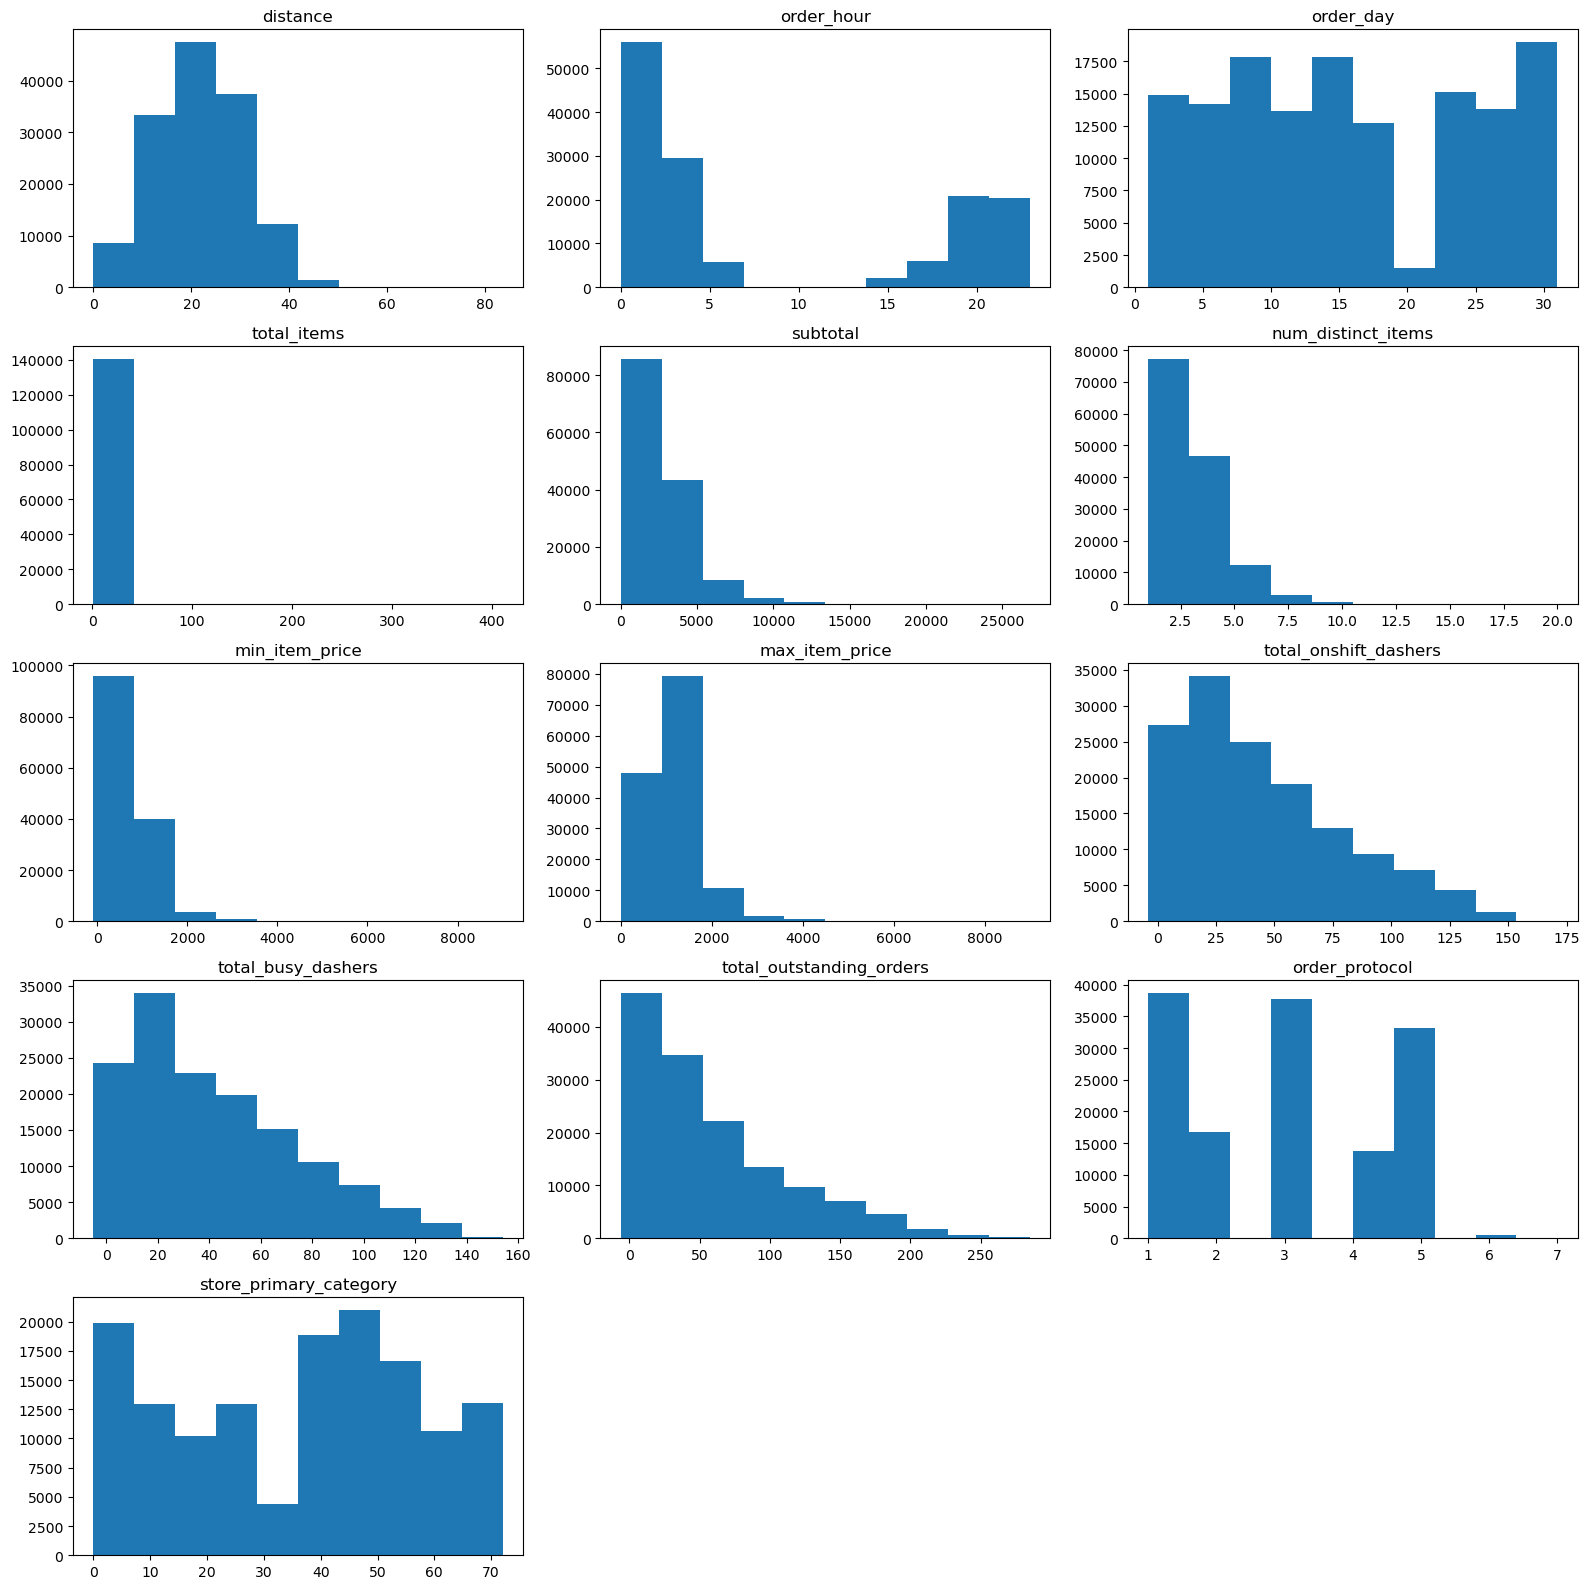

In [30]:
# Plot distributions for all numerical columns

plt.figure(figsize=(16,16))
for i, feature in enumerate(numerical_columns):
  plt.subplot(5,3,i+1)
  plt.hist(X_train[feature])
  plt.title(feature)
  plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

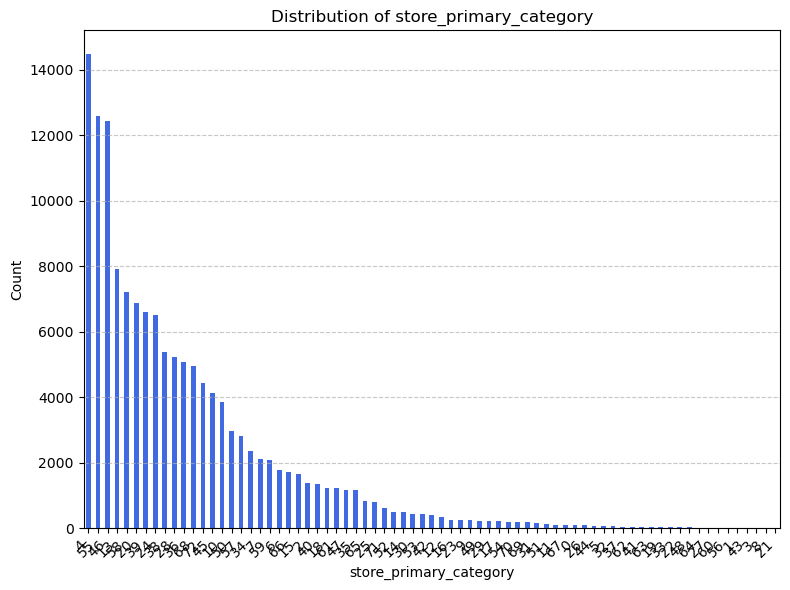

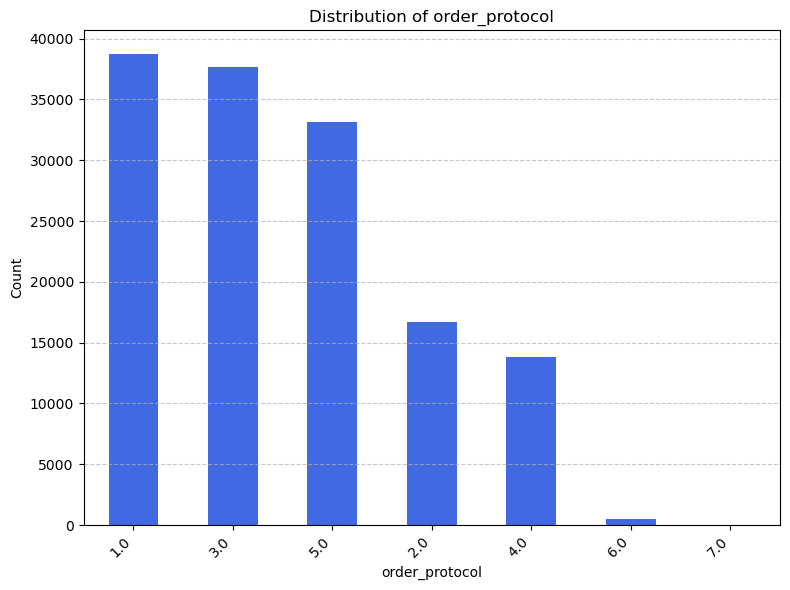

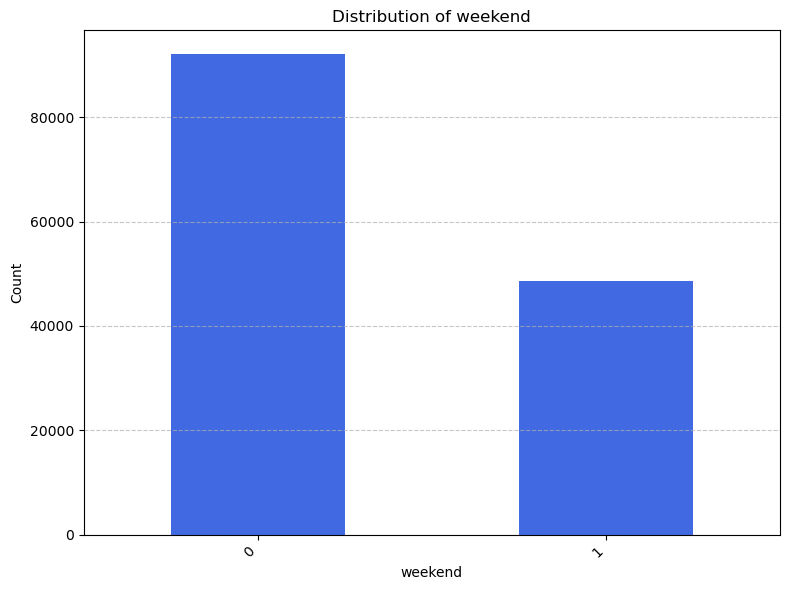

In [160]:
# Distribution of categorical columns

categorical_columns = ['store_primary_category', 'order_protocol', 'weekend']
for col in categorical_columns:
    X_train[col].value_counts().sort_values(ascending=False).plot(
        kind='bar',
        title=f'Distribution of {col}',
        figsize=(8, 6),
        color='royalblue',

    )
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

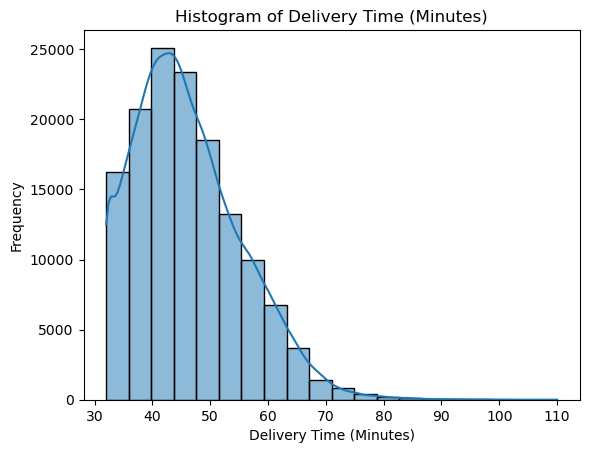

Text(0.5, 0, 'Delivery Time (Minutes)')

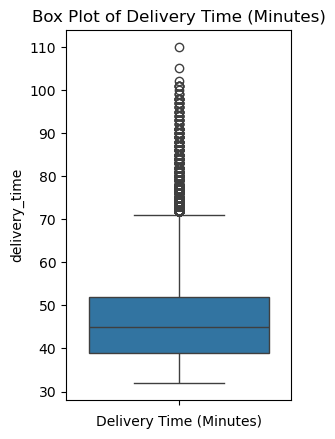

In [34]:
# Distribution of time_taken

sns.histplot(y_train, kde=True, bins=20)
plt.title('Histogram of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')




#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

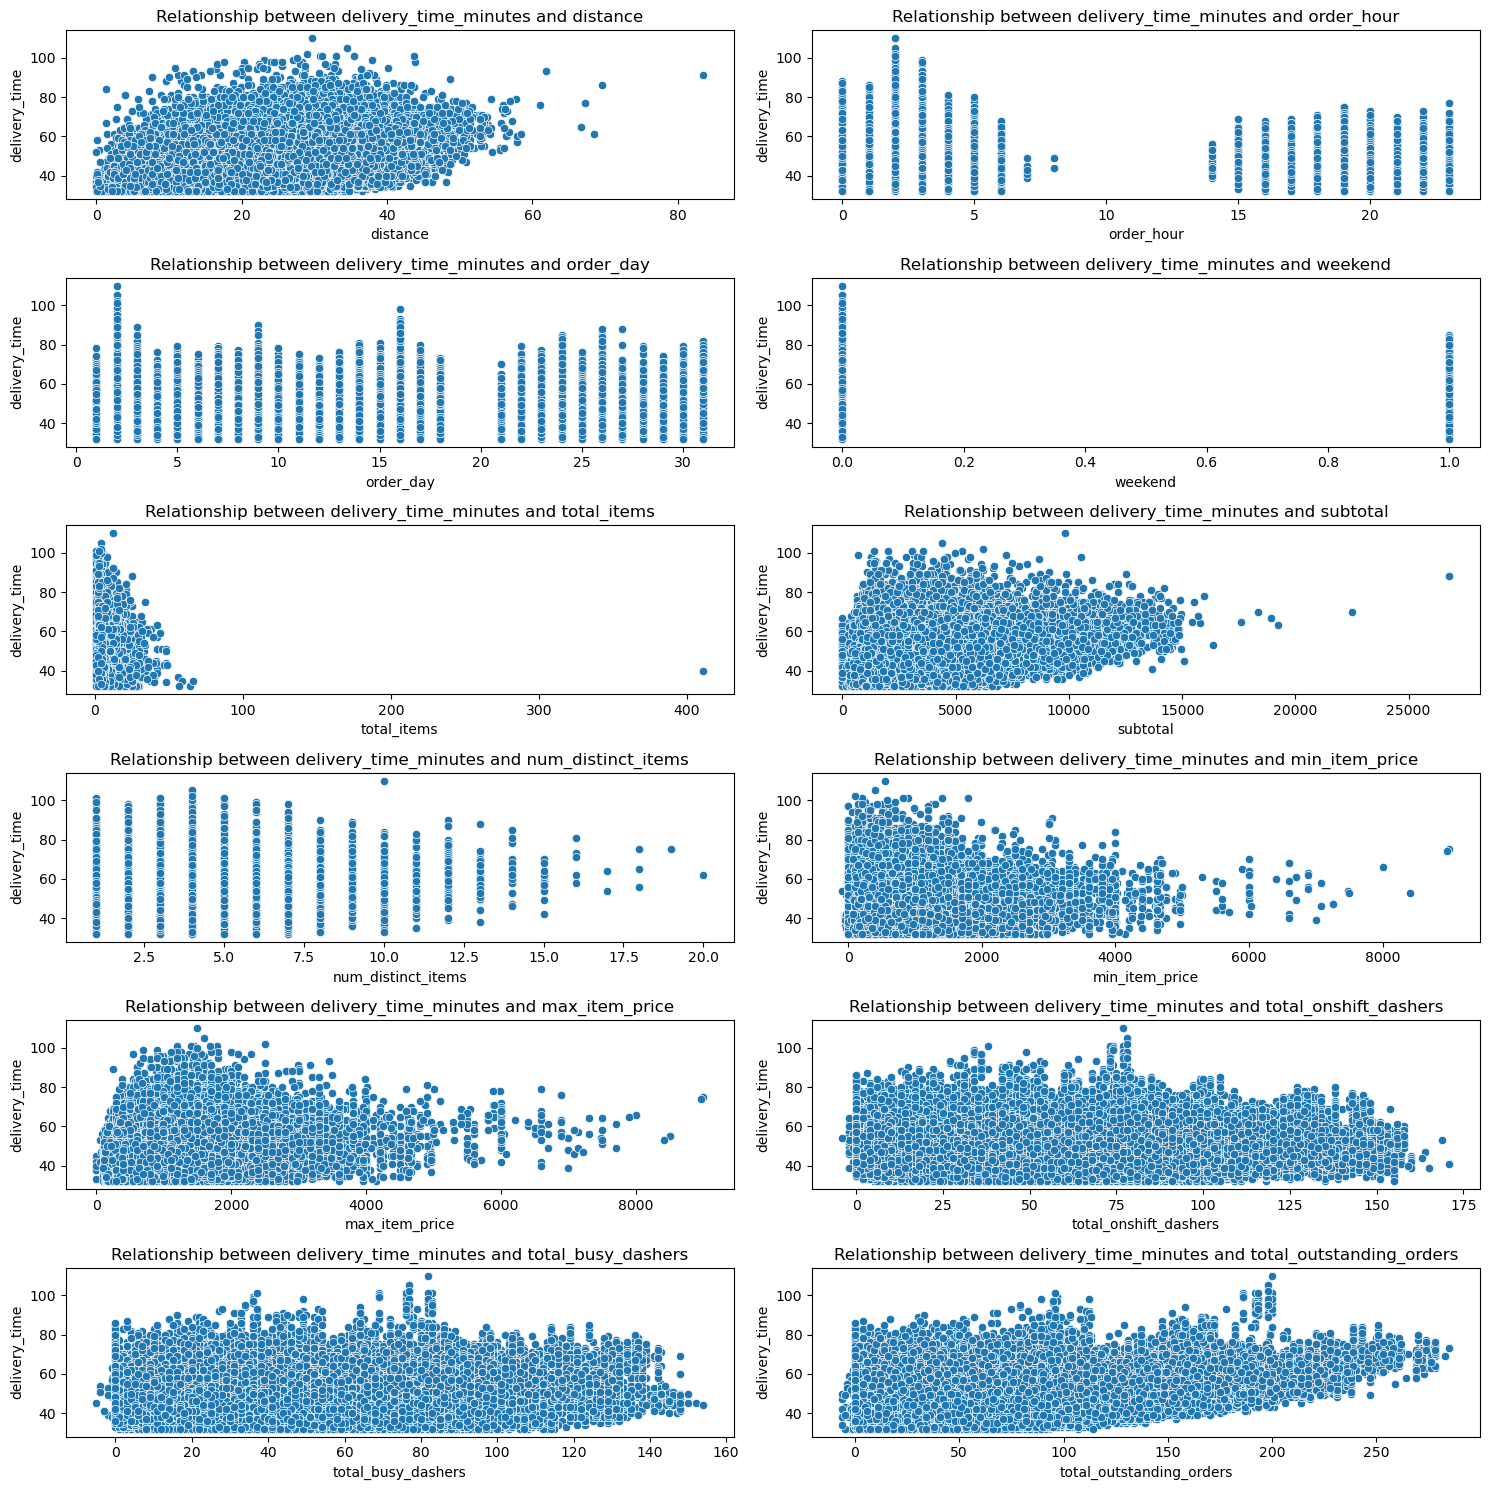

In [37]:
# Scatter plot to visualise the relationship between time_taken and other features

#features = ['order_hour', 'order_day', 'distance', 'weekend', 'total_items']
features = ['distance', 'order_hour', 'order_day', 'weekend', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 2, i+1)
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'Relationship between delivery_time_minutes and {feature}')
    plt.xlabel(feature)
    plt.ylabel('delivery_time')

plt.tight_layout()
plt.show()

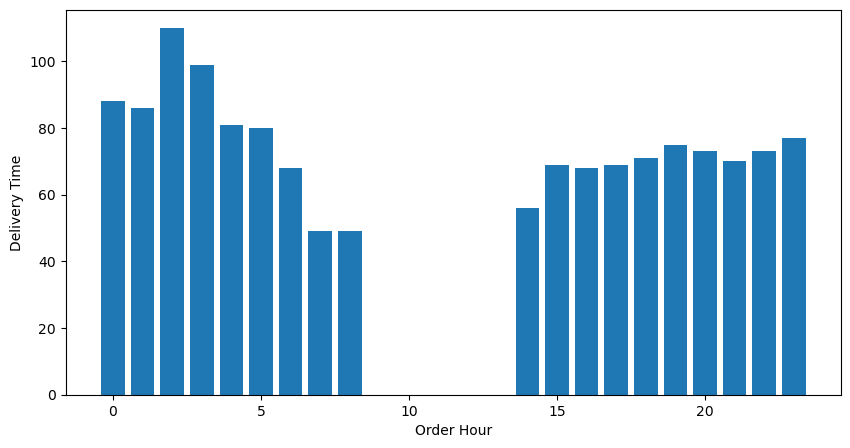

In [38]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10, 5))
plt.bar(X_train['order_hour'], y_train)
plt.xlabel('Order Hour')
plt.ylabel('Delivery Time')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

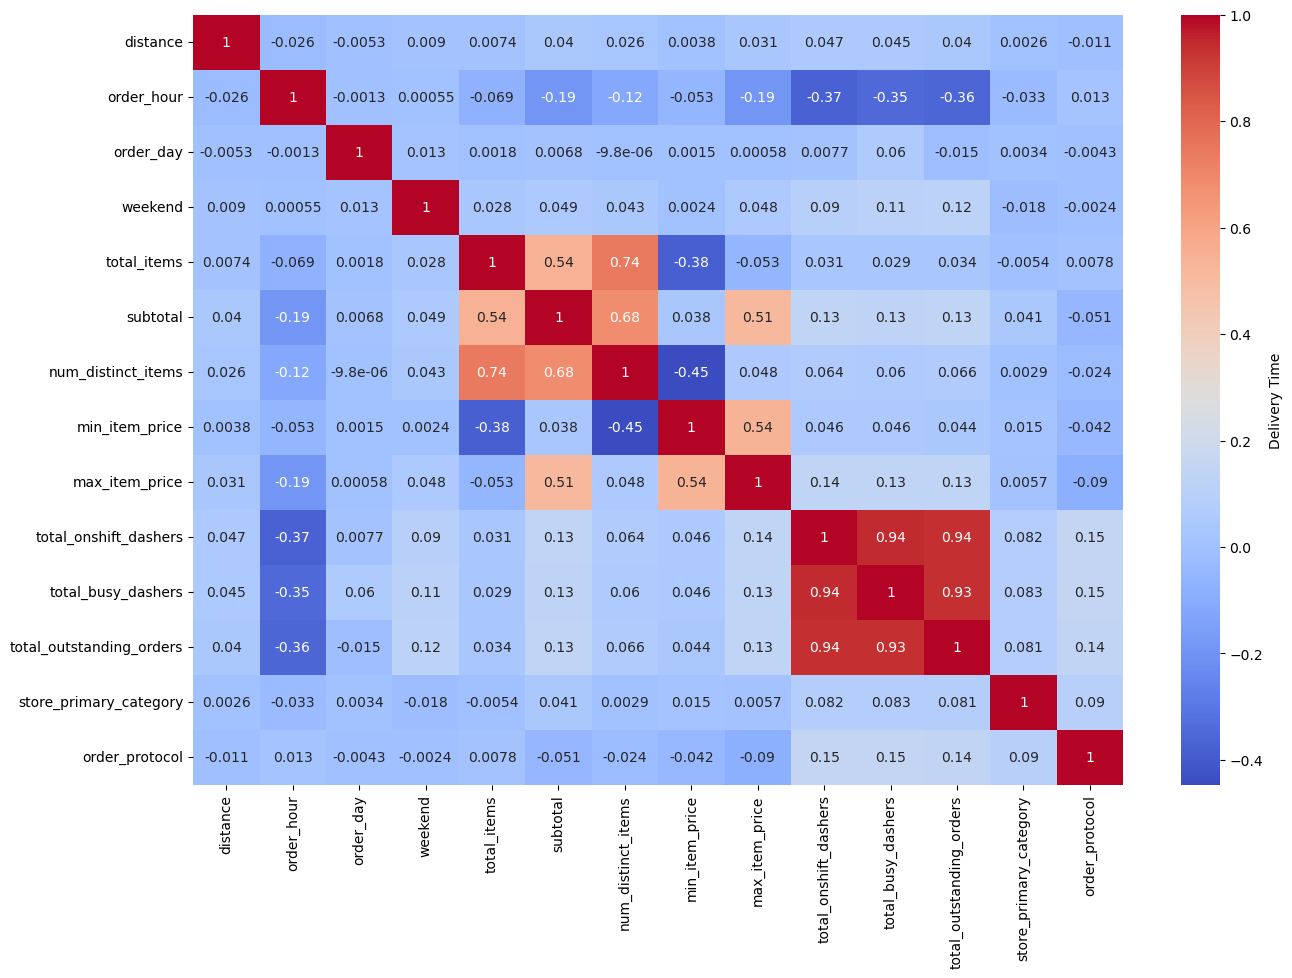

In [41]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True, cbar_kws={'label': 'Delivery Time'}, cmap='coolwarm')
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [43]:
# Drop 3-5 weakly correlated columns from training dataset

#X_train.corr()
corr_matrix = porterdf.corr()
correlation_with_target_variable = corr_matrix['delivery_time'].abs().sort_values(ascending=False)
print('features correlation with target variable: \n',correlation_with_target_variable)

features correlation with target variable: 
 delivery_time               1.000000
distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
order_hour                  0.346366
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
order_protocol              0.136755
weekend                     0.136414
order_day                   0.085667
market_id                   0.073016
store_primary_category      0.026973
min_item_price              0.022753
Name: delivery_time, dtype: float64


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

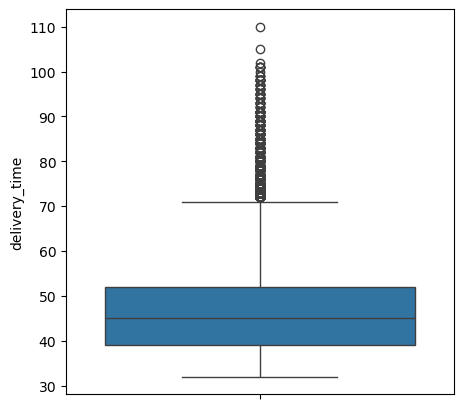

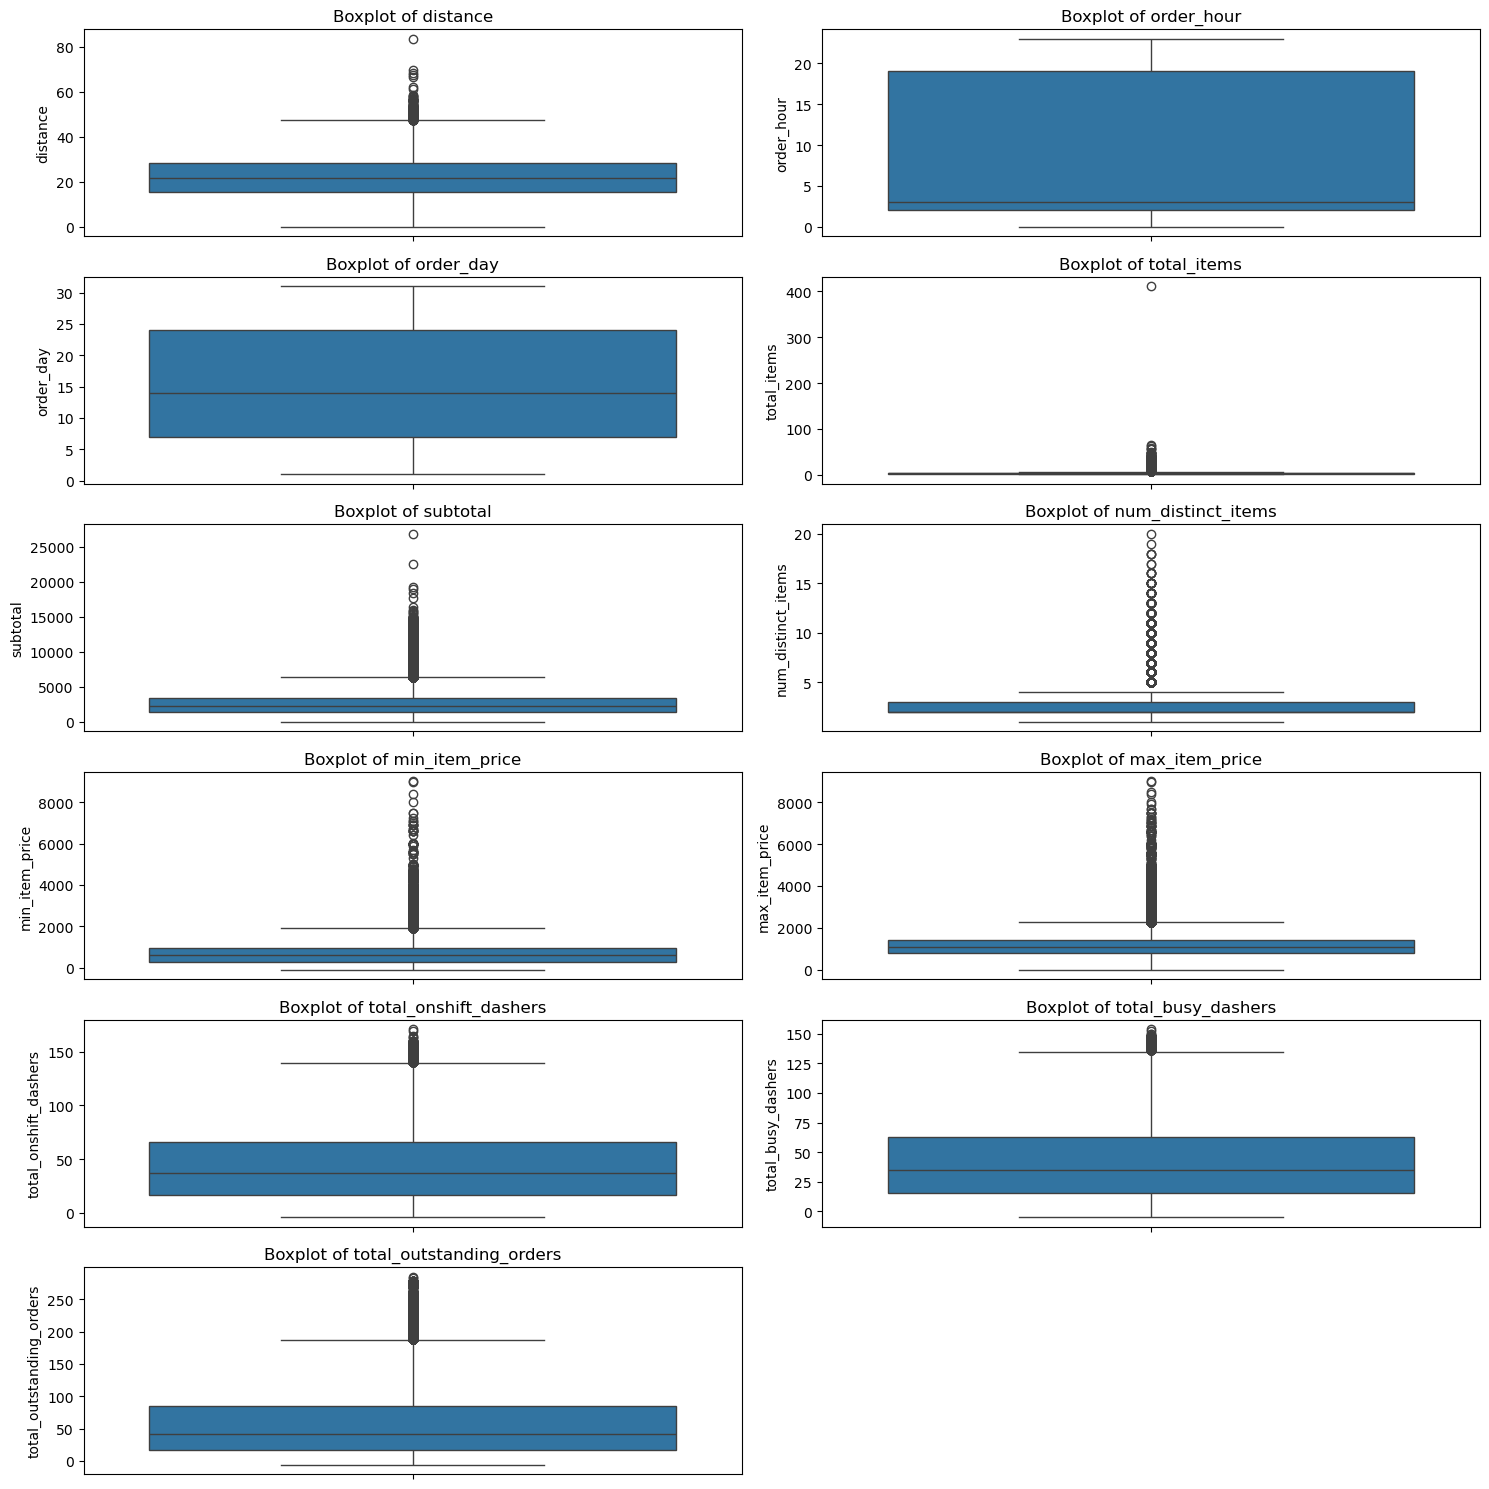

In [46]:
# Boxplot for time_taken
plt.figure(figsize=(5,5))
sns.boxplot(y=y_train)
plt.xticks(rotation=90);
plt.show()

numerical_features = ['distance', 'order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

plt.figure(figsize=(15, 15))
# Loop through numerical features and plot boxplot distribution
for i, feature in enumerate(numerical_features):
    plt.subplot(6,2,i+1)   
    sns.boxplot(y=X_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

          market_id   total_items      subtotal  num_distinct_items  \
count  11391.000000  11391.000000  11391.000000        11391.000000   
mean       2.709859      2.133614   1002.285840            1.904135   
std        1.380540      0.720248    382.427408            0.713676   
min        1.000000      1.000000      0.000000            1.000000   
25%        2.000000      2.000000    718.000000            1.000000   
50%        2.000000      2.000000    978.000000            2.000000   
75%        4.000000      3.000000   1248.000000            2.000000   
max        6.000000      3.000000   1999.000000            3.000000   

       min_item_price  max_item_price  total_onshift_dashers  \
count    11391.000000    11391.000000           11391.000000   
mean       344.380476      499.821789              24.135985   
std        146.960347      136.946861              18.669352   
min          0.000000        0.000000              -2.000000   
25%        225.000000      399.000000   

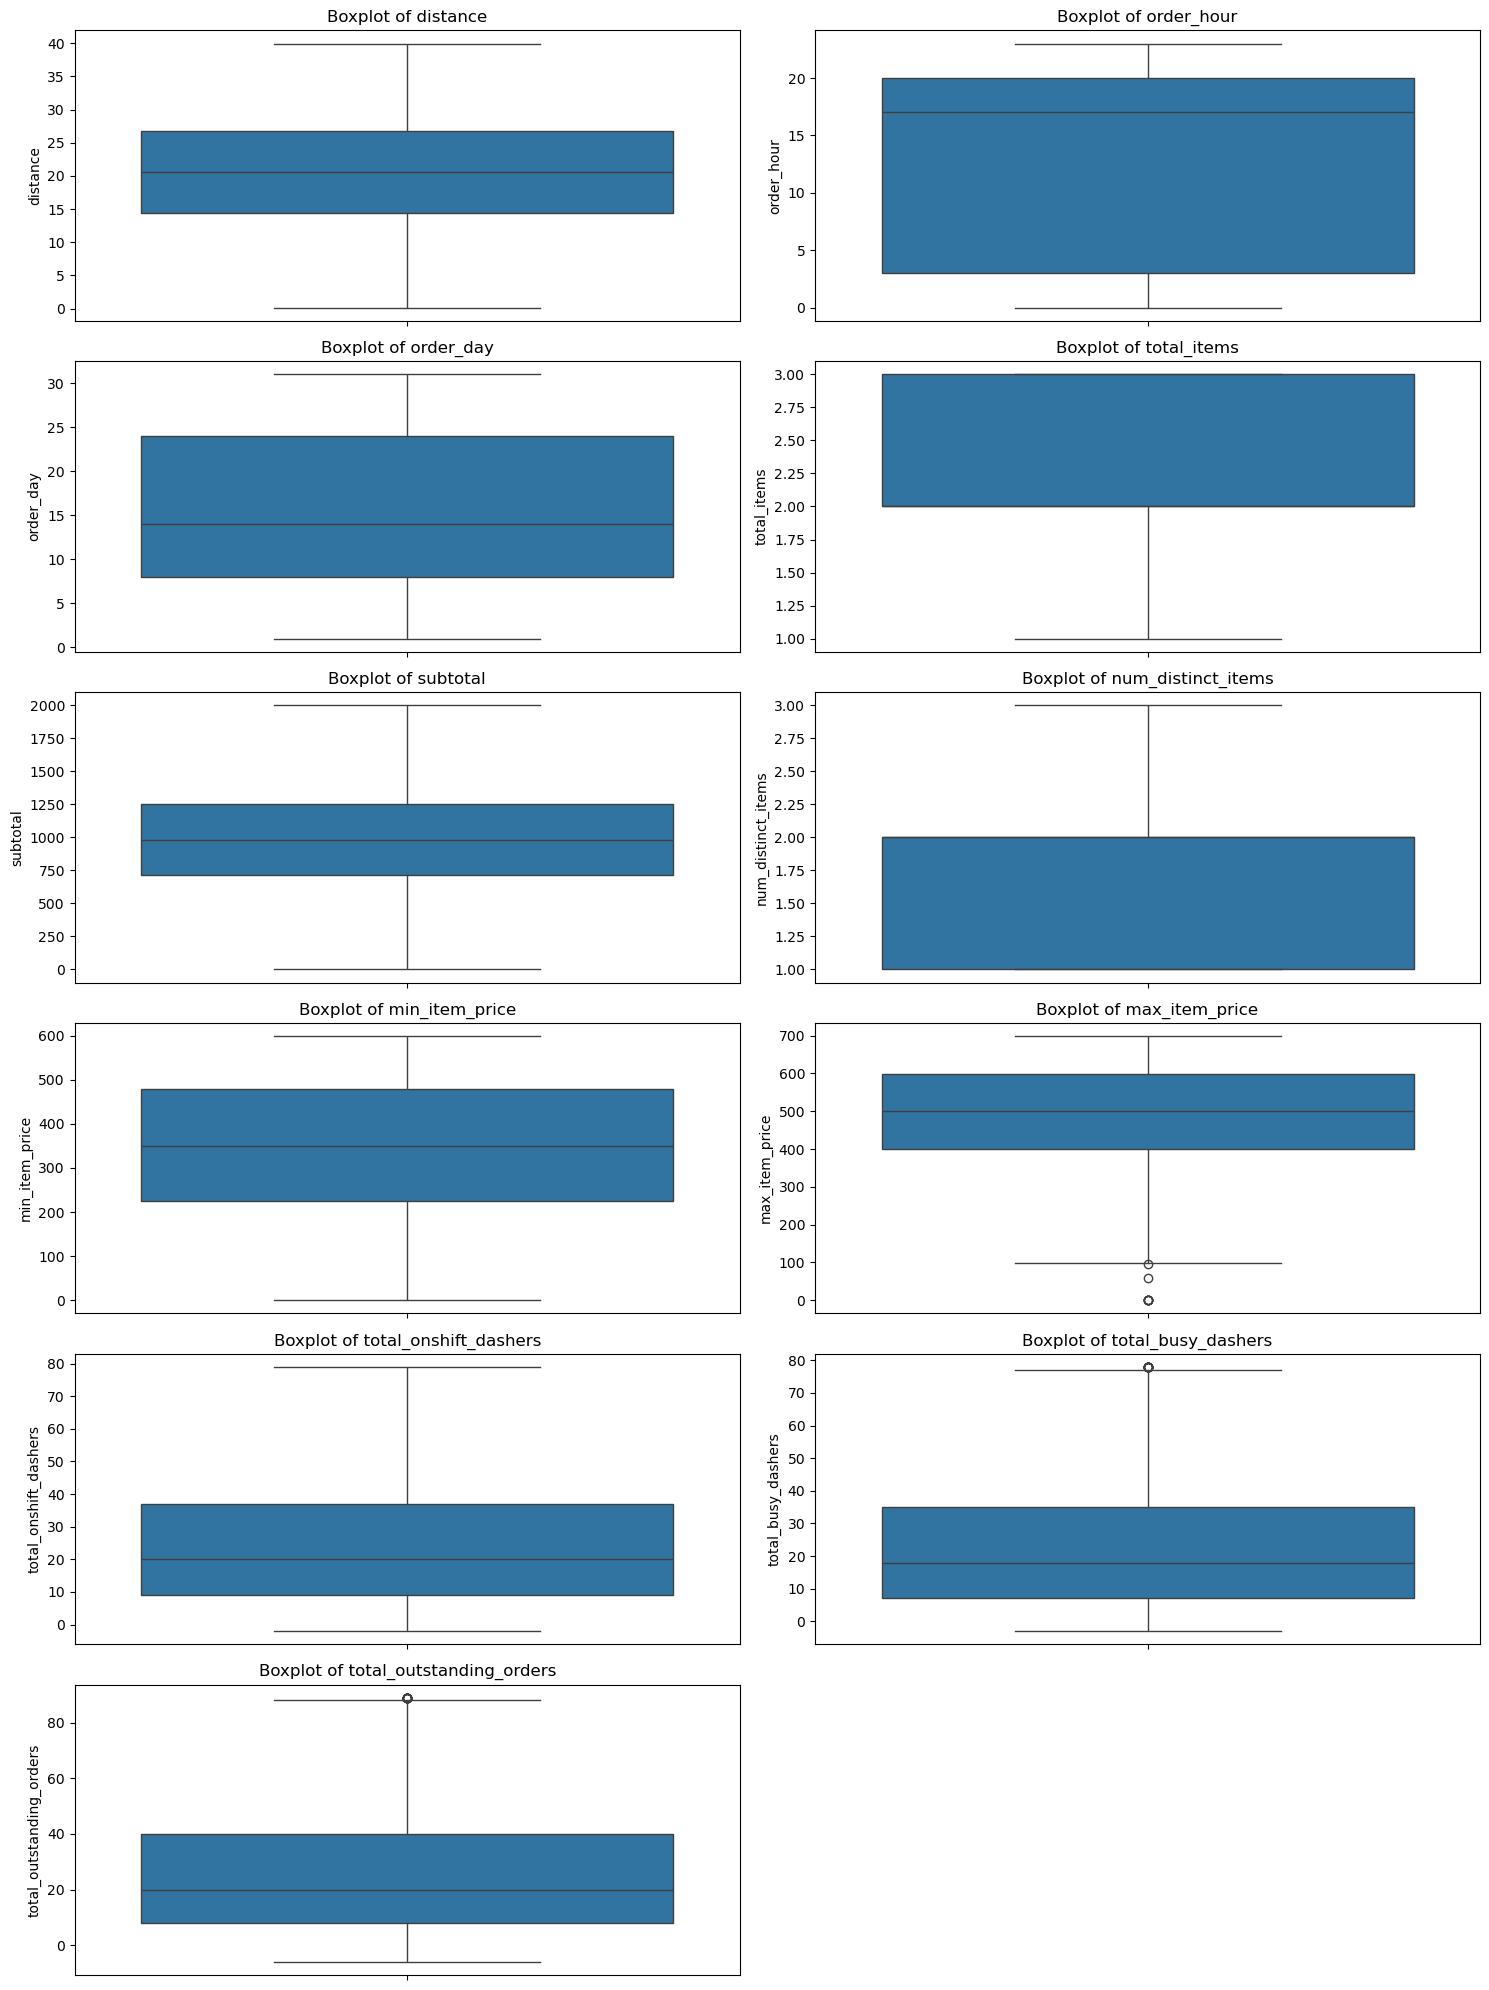

In [164]:
# Handle outliers


porterdf = porterdf[porterdf['distance'] < 40]
porterdf = porterdf[porterdf['total_items'] < 4]
porterdf = porterdf[porterdf['num_distinct_items'] < 5]
porterdf = porterdf[porterdf['max_item_price'] < 700]
porterdf = porterdf[porterdf['min_item_price'] < 600]
porterdf = porterdf[porterdf['subtotal'] < 2000]

porterdf = porterdf[porterdf['total_onshift_dashers'] < 80]
porterdf = porterdf[porterdf['total_busy_dashers'] < 80]
porterdf = porterdf[porterdf['total_outstanding_orders'] < 90]

print(porterdf.describe())
print(porterdf.describe())

plt.figure(figsize=(15, 20))
# Loop through numerical features and plot boxplot distribution
for i, feature in enumerate(numerical_features):
    plt.subplot(6,2,i+1)   
    sns.boxplot(y=porterdf[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [50]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = [ 'distance','order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'order_protocol', 'store_primary_category']
categorical_columns = ['weekend', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

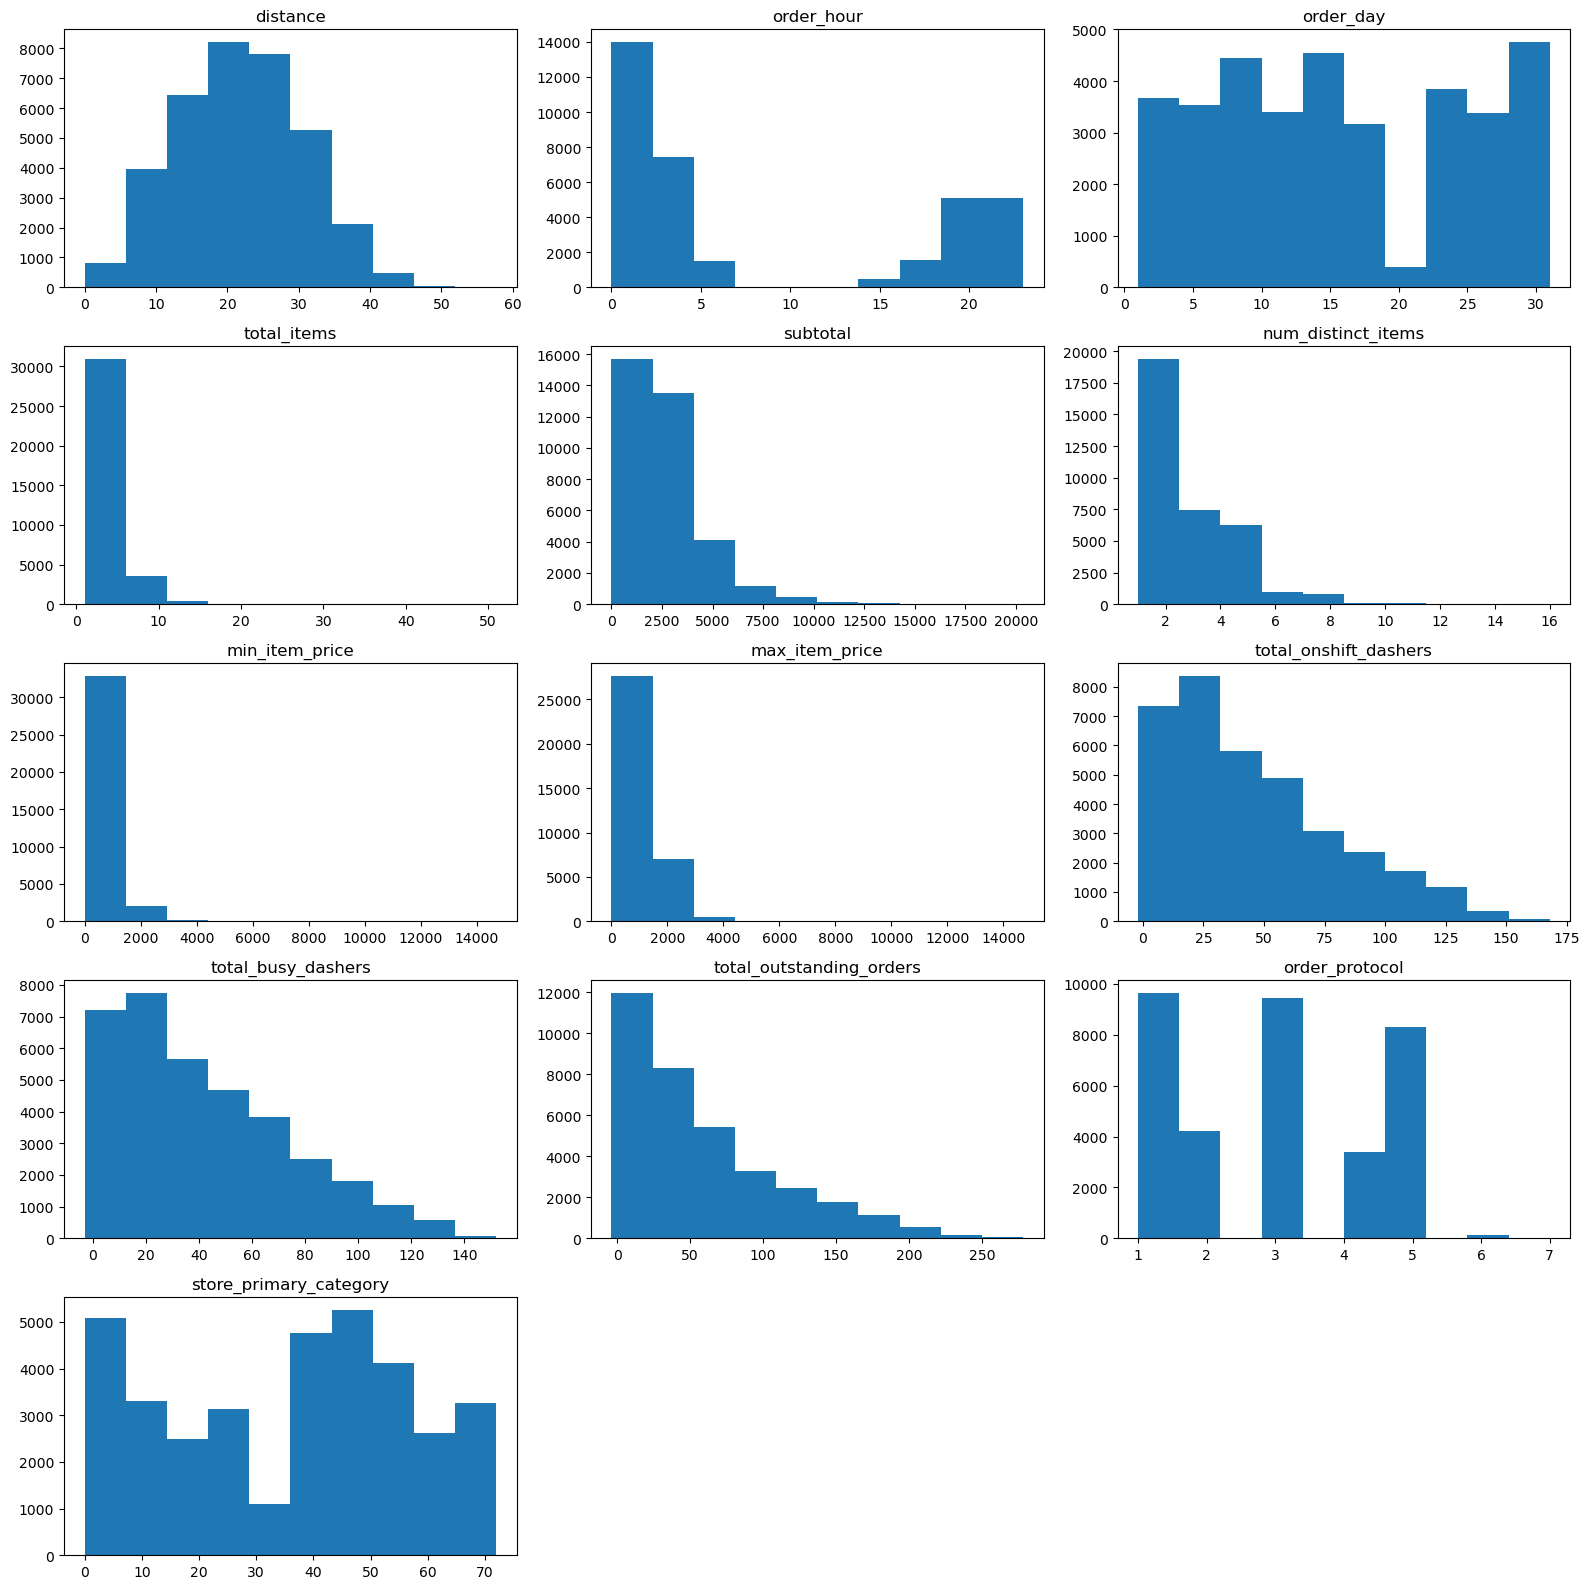

In [53]:
# Plot distributions for all numerical columns


plt.figure(figsize=(16,16))
for i, feature in enumerate(numerical_columns):
  plt.subplot(5,3,i+1)
  plt.hist(X_test[feature])
  plt.title(feature)
  plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

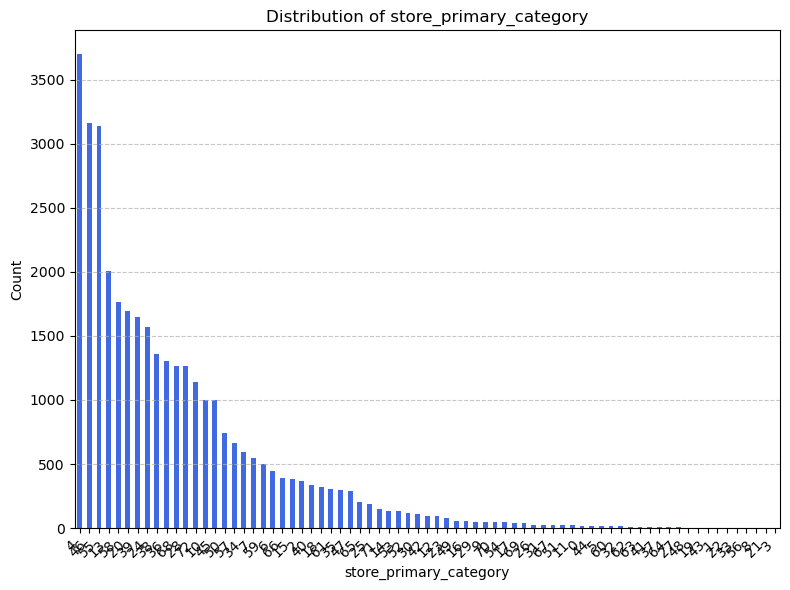

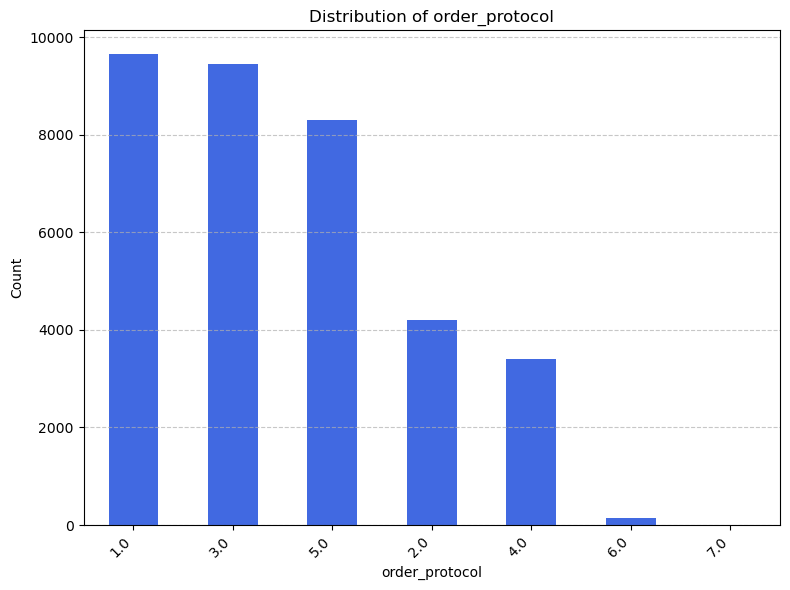

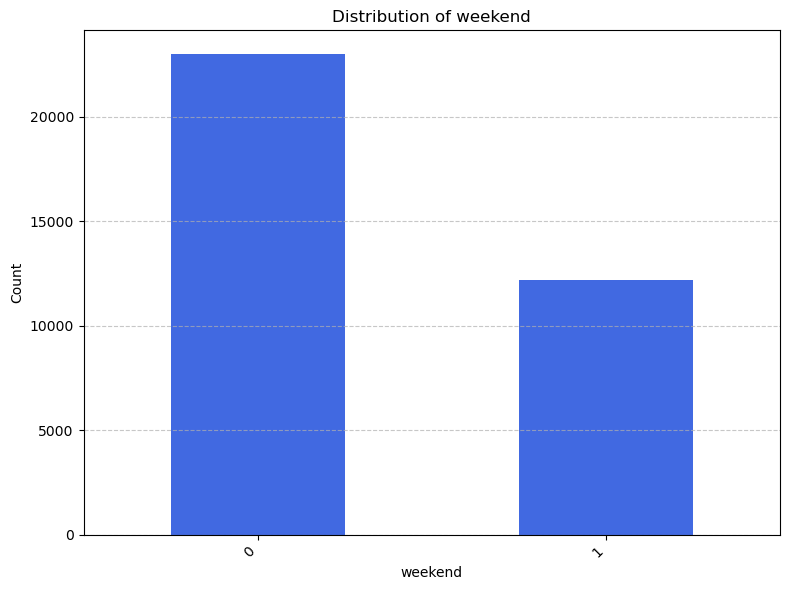

In [166]:
# Distribution of categorical columns
#sns.countplot(x=X_test.weekend)


categorical_columns = ['store_primary_category', 'order_protocol', 'weekend']
for col in categorical_columns:
    X_test[col].value_counts().sort_values(ascending=False).plot(
        kind='bar',
        title=f'Distribution of {col}',
        figsize=(8, 6),
        color='royalblue',
    )
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

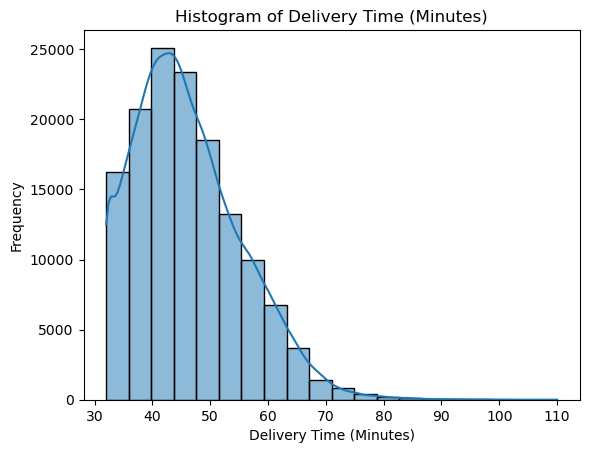

Text(0.5, 0, 'Delivery Time (Minutes)')

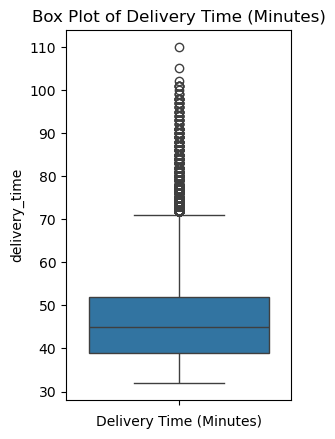

In [57]:
# Distribution of time_taken

sns.histplot(y_train, kde=True, bins=20)
plt.title('Histogram of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')




#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

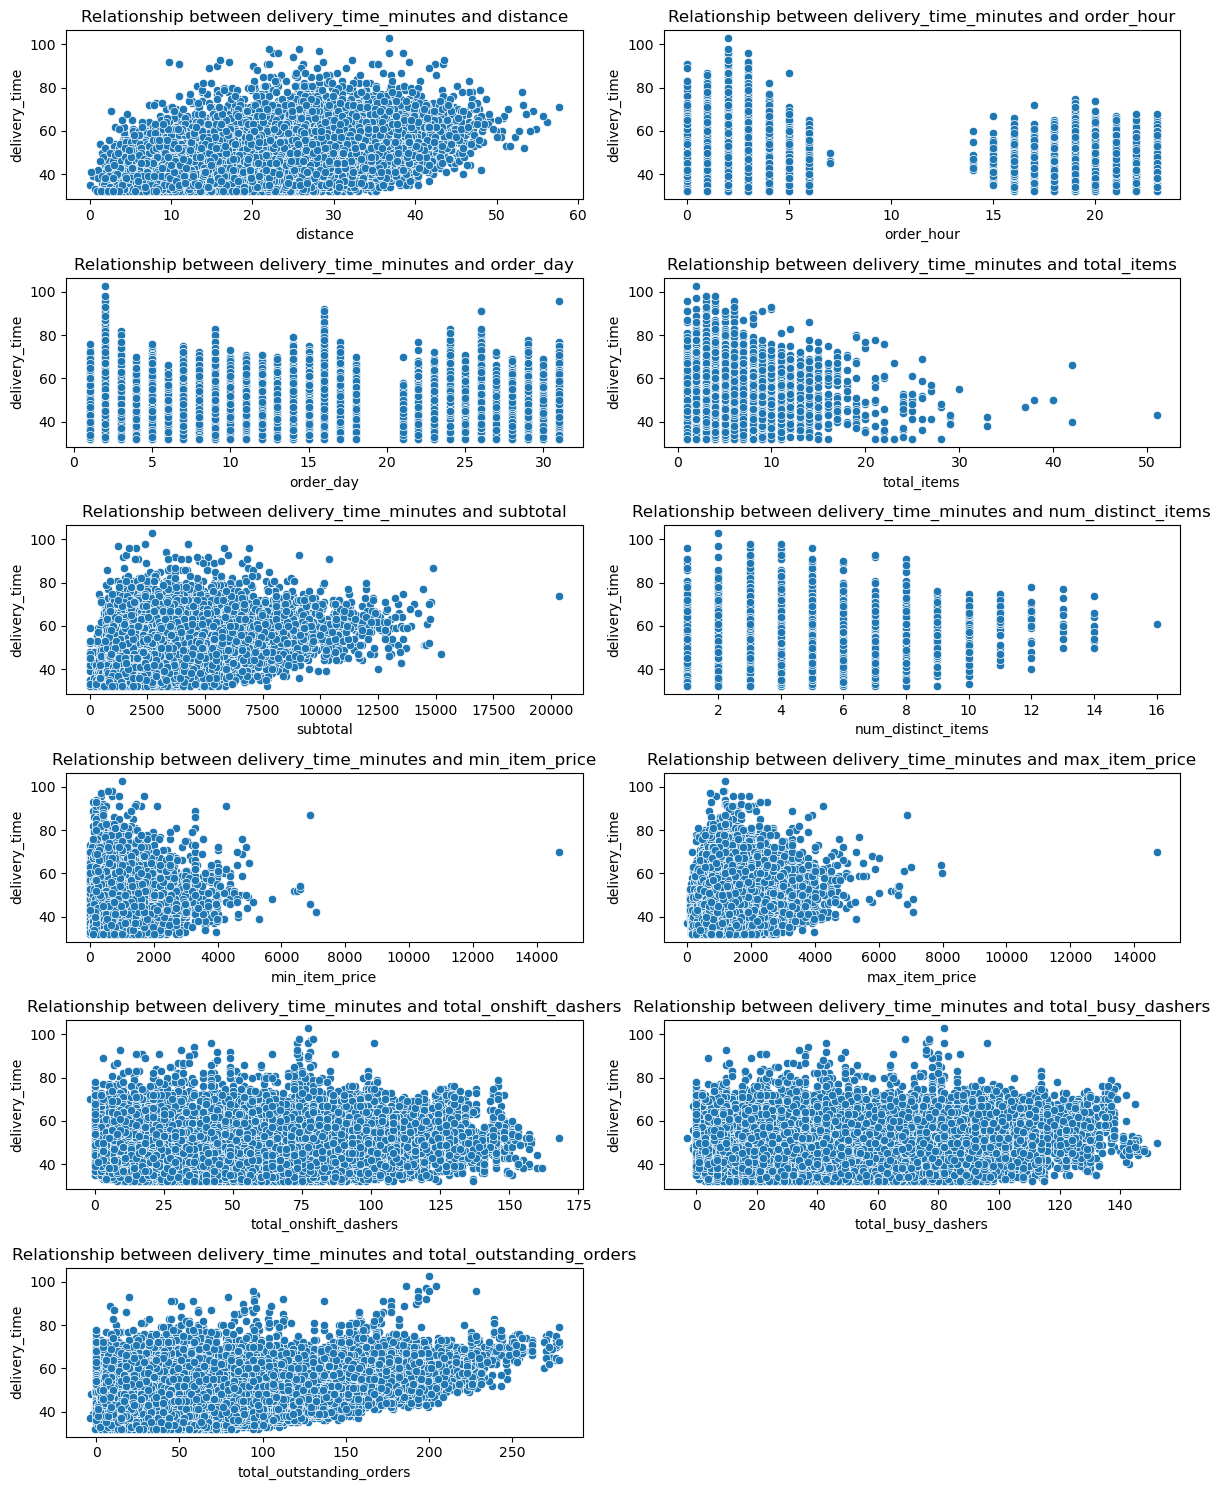

In [59]:
# Scatter plot to visualise the relationship between time_taken and other features

#features = ['order_hour', 'order_day', 'distance', 'total_items', 'weekend']
features = ['distance', 'order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']
plt.figure(figsize=(12, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 2, i + 1)
    sns.scatterplot(x=X_test[feature], y=y_test)
    plt.title(f'Relationship between delivery_time_minutes and {feature}')
    plt.xlabel(feature)
    plt.ylabel('delivery_time')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [61]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [64]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [66]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

# Apply scaling 
X_train[['distance_scaled', 'order_hour_scaled', 'order_day_scaled', 'total_items_scaled', 'subtotal_scaled', 'num_distinct_items_scaled', 'min_item_price_scaled',
             'max_item_price_scaled', 'total_onshift_dashers_scaled', 'total_busy_dashers_scaled', 'total_outstanding_orders_scaled']] = scaler.fit_transform(X_train[['distance', 'order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']])

# Display the DataFrame with scaled columns
print(X_train[['distance_scaled', 'order_hour_scaled', 'order_day_scaled', 'total_items_scaled', 'subtotal_scaled', 'num_distinct_items_scaled', 'min_item_price_scaled',
             'max_item_price_scaled', 'total_onshift_dashers_scaled', 'total_busy_dashers_scaled', 'total_outstanding_orders_scaled']])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [70]:
# Create/Initialise the model
model = LinearRegression()

In [71]:
# Train the model using the training data
model.fit(X_train, y_train)

#print(X_train.describe())

#print(y_train.describe())


LinearRegression()

In [72]:
# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Find results for evaluation metrics

print("mean absolute error", mean_absolute_error(y_test,y_pred))
print("mean squred error", mean_squared_error(y_test,y_pred))
print("root mean squred error", np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score", r2_score(y_test,y_pred))
     

mean absolute error 2.3741763965990486
mean squred error 11.073447616210613
root mean squred error 3.327679013398169
r2_score 0.8734857623765276


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [77]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

model = LinearRegression()

# Loop through the number of features
for n_features in range(12, 0, -1):
   
    # Initialize RFE with the current number of features
    rfe = RFE(model, n_features_to_select=n_features)

    # Fit RFE
    rfe.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rfe.predict(X_test)
    
    # Calculate and print the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Number of features: {n_features},  mean squared error : {mse}')

Number of features: 12,  mean squared error : 11.160276527832874
Number of features: 11,  mean squared error : 14.782887359962906
Number of features: 10,  mean squared error : 14.815136251431316
Number of features: 9,  mean squared error : 14.845503029371411
Number of features: 8,  mean squared error : 14.849239643145943
Number of features: 7,  mean squared error : 16.5555806538124
Number of features: 6,  mean squared error : 21.78405270350981
Number of features: 5,  mean squared error : 57.160377047752775
Number of features: 4,  mean squared error : 58.837681710974636
Number of features: 3,  mean squared error : 76.50123158509159
Number of features: 2,  mean squared error : 77.87418418532005
Number of features: 1,  mean squared error : 85.96031488766305


In [78]:
# Build the final model with selected number of features
import statsmodels.api as sm
print(X_train)

X = X_train[['distance', 'order_hour', 'order_day', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
             'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders' ]]

#X = X_train[['order_hour', 'order_day', 'distance', 'total_items', 'weekend' ]]
y = y_train
X = sm.add_constant(X)
lr_m3 = sm.OLS(y,X).fit()
print(lr_m3.summary())

#X_train = X_train.drop(columns=['distance_scaled', 'order_hour_scaled', 'order_day_scaled', 'total_items_scaled', 'subtotal_scaled', 'num_distinct_items_scaled', 'min_item_price_scaled',
 #            'max_item_price_scaled', 'total_onshift_dashers_scaled', 'total_busy_dashers_scaled', 'total_outstanding_orders_scaled'])

        distance  order_hour  order_day  weekend  total_items  subtotal  \
102712     30.32          21          3        0            1       820   
94576      31.16           2         23        0            1       995   
49784      18.16          21          6        0            4      2040   
37753      33.44           3         27        0            2      2376   
91728      31.56          21         13        0            1      1430   
...          ...         ...        ...      ...          ...       ...   
119879     37.04          23         15        1            1      1111   
103694     27.72           3         28        0            4      2880   
131932     21.92           1         27        0            2      1799   
146867     23.60           3         24        1           10      4015   
121958     18.04           3         26        0            4      4951   

        num_distinct_items  min_item_price  max_item_price  \
102712                   1           

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

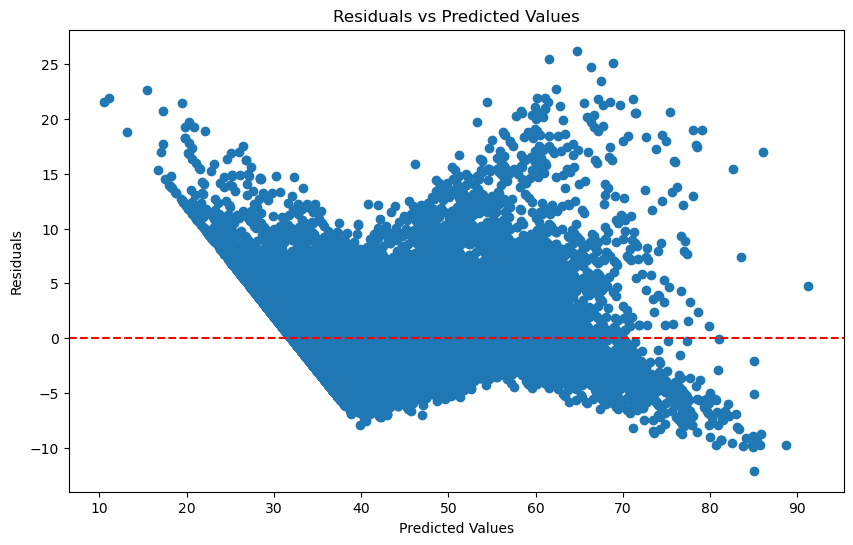

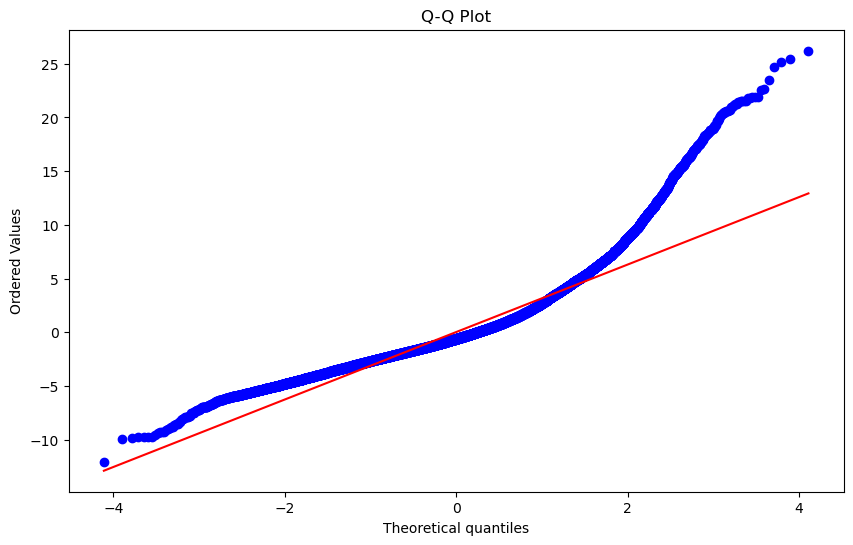

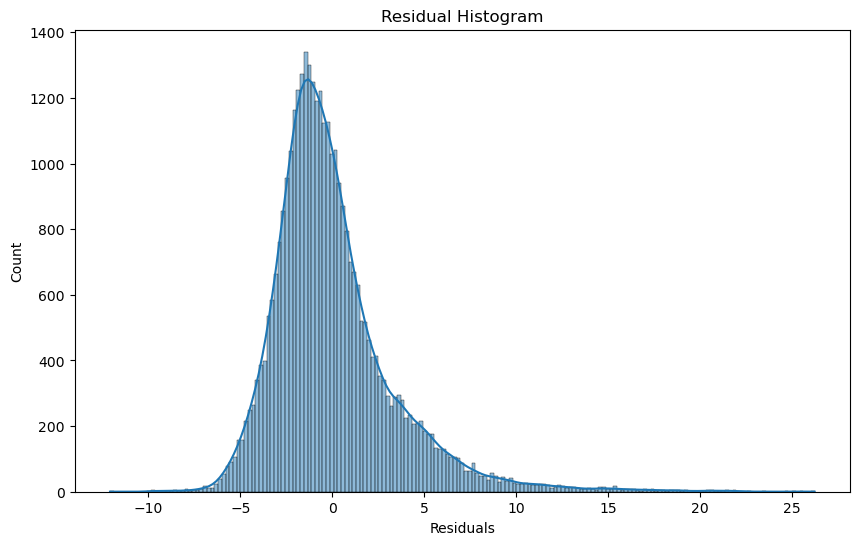

In [81]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Residual histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Histogram')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [85]:
# Compare the scaled vs unscaled features used in the final model

model_unscaled = LinearRegression()
model_scaled = LinearRegression()

# Train the model with unscaled features
model_unscaled.fit(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled features
model_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_unscaled = model_unscaled.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate performance metrics
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)
r2_unscaled = r2_score(y_test, y_pred_unscaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Print coefficients and performance metrics
print("Unscaled Model Coefficients:", model_unscaled.coef_)
print("Unscaled Model MSE:", mse_unscaled)
print("Unscaled Model R2:", r2_unscaled)

print("Scaled Model Coefficients:", model_scaled.coef_)
print("Scaled Model MSE:", mse_scaled)
print("Scaled Model R2:", r2_scaled)

# Plotting the coefficients for comparison
features = X.columns
coefficients_unscaled = model_unscaled.coef_
coefficients_scaled = model_scaled.coef_


Unscaled Model Coefficients: [ 4.74825690e-01 -2.51033566e-01 -1.58734181e-02  1.23658297e+00
 -3.58551468e-02  1.26200099e-03  5.50513418e-01  2.02999315e-04
  5.69917171e-04 -3.65984173e-01 -1.36920455e-01  3.45768427e-01
  4.63597747e-03 -6.63827731e-01]
Unscaled Model MSE: 11.073447616210613
Unscaled Model R2: 0.8734857623765276
Scaled Model Coefficients: [  4.15525479  -2.17828414  -0.146401     0.58801769  -0.09778142
   2.31047378   0.89514433   0.10528193   0.31897808 -12.65292635
  -4.40851556  18.24739376   0.09602329  -1.0044918 ]
Scaled Model MSE: 11.073447616210615
Scaled Model R2: 0.8734857623765276


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [87]:
# Analyze the effect of a unit change in a feature, say 'total_items'

model = LinearRegression()
model.fit(X_train, y_train)

# coefficient for 'total_items'
coef_total_items = model.coef_[0]

print(f"Coefficient for 'total_items' is: {coef_total_items}")

print(f"A unit change in 'total_items' results in a change of {coef_total_items} in the target variable.")

Coefficient for 'total_items' is: 0.4748256904752339
A unit change in 'total_items' results in a change of 0.4748256904752339 in the target variable.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 splits the training and test data into 20 and 80 percentage. That means Training data 20% and Test data 80% 



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Categorial variable weekend and distance has highest correlation with the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used boxplot to identify the outliners in the target variable. Based on the interquartile range outliners were identified and removed.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Distance, Weekend and total outstanding orders are affecting the delivery time 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable and one or more independent variables. The core idea behind linear regression is to find a straight line that best represents the relationship between these variables. This line is called the "regression line," and it serves as a predictive tool to estimate the value of the dependent variable based on the values of the independent variables.

> The process of linear regression involves finding the best-fitting line through your data points. This is done by minimizing the difference between the actual values of the dependent variable and the values predicted by the regression line. This difference is often measured using a metric called the "sum of squared errors."




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> simple linear regression has only one independent variable. For example, predicting house prices based on their area.
>
> When there are multiple independent variables, we call it multiple linear regression. For example, predicting a person’s salary based on years of experience, education level, and location.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function in linear regression identifies the error between the predicted values and the actual values of the dependent variable. The goal of linear regression is to find the coefficients that minimize this error. 




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting occurs when a model learns the training data too well, capturing noise and details that do not generalize to new data. This results in a model that performs well on the training data but poorly on the test data.

> Underfitting occurs when a model is too simple to capture the underlying patterns in the data. This results in a model that performs poorly on both the training data and the test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are a useful diagnostic tool for evaluating the fit of a linear regression model. They help in identifying various issues that might affect the model's performance.